**Salary Prediction based on Country and Race**

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


**Data Preprocessing**

In [3]:
#checking the shape of the data
df.shape

(6704, 9)

In [4]:
#checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null/missing value is very less as compared to the total number of rows, I will be dropping these rows.

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [7]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

Checking data type of each column

In [8]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Checking for unique values in each column

In [9]:
#unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

The job title column has 191 different values. It will be very difficult to analyze so many job titles. So, I will group the job titles under similar job domains.

**Grouping Job Titles**

In [10]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [12]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

# Apply the function to the DataFrame column
df['Job Title'] = df['Job Title'].apply(categorize_job_title)


In [13]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. So I will be grouping it with Bachelor

**Grouping Education Level**

In [15]:
def group_education(education):
    education = str(education).lower()
    if 'high school' in education:
        return 'High School'
    elif 'bachelor' in education:
        return 'Bachelors'
    elif 'master' in education:
        return 'Masters'
    elif 'phd' in education or 'doctorate' in education:
        return 'PhD'
    else:
        return 'Other'

# Apply the function to the column
df['Education Level'] = df['Education Level'].apply(group_education)


**Descriptive Statistics**

In [16]:
#descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [17]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


**Exploratory Data Analysis**

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.


**Pie chart for Gender**

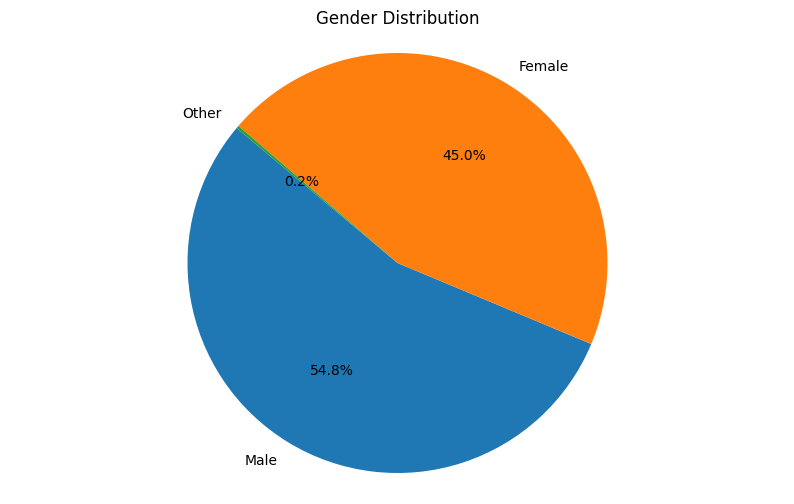

In [18]:
# Pie chart for Gender Distribution
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), 
        labels=df['Gender'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Ensures pie is a circle
plt.show()


The pie chart shows that majority of the employees are male with 54.8 % on the dataset, followed by females with 45% and 0.2% employees belong to other gender.

**Age Distribution**

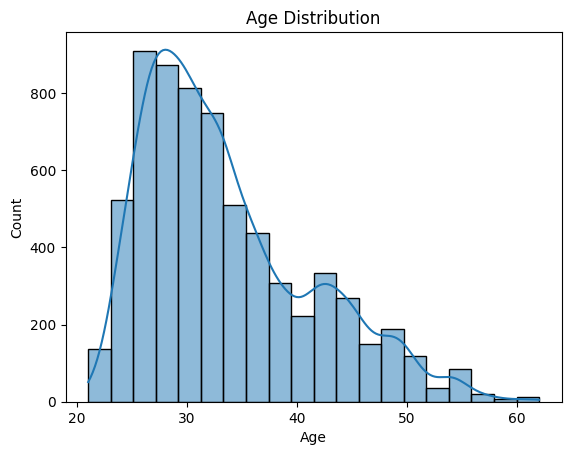

In [19]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

**Education Level**

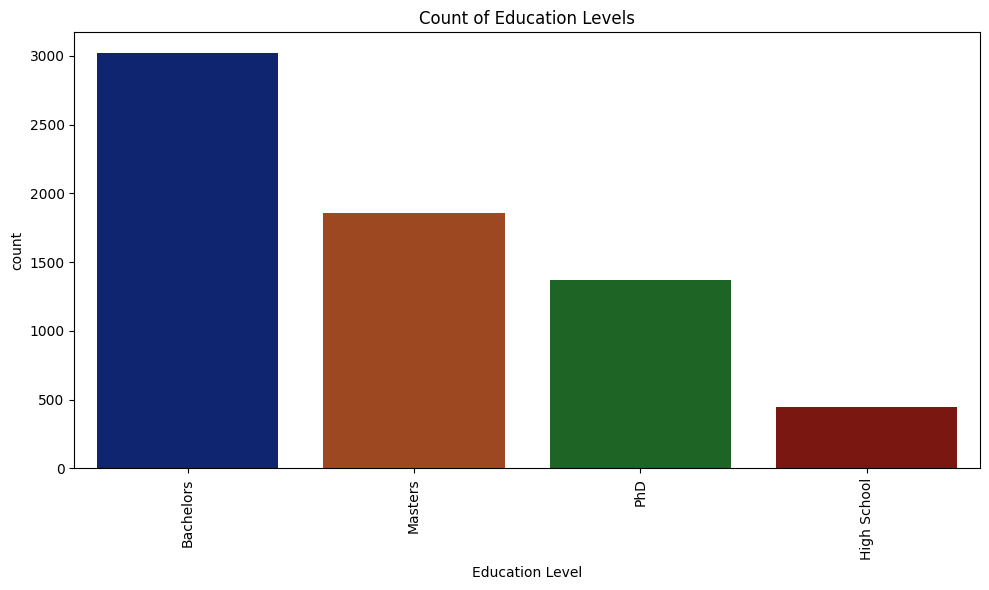

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education Level', data=df, hue='Education Level', palette='dark', legend=False)
plt.xticks(rotation=90)
plt.title('Count of Education Levels')
plt.tight_layout()
plt.show()

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

**Job Title**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

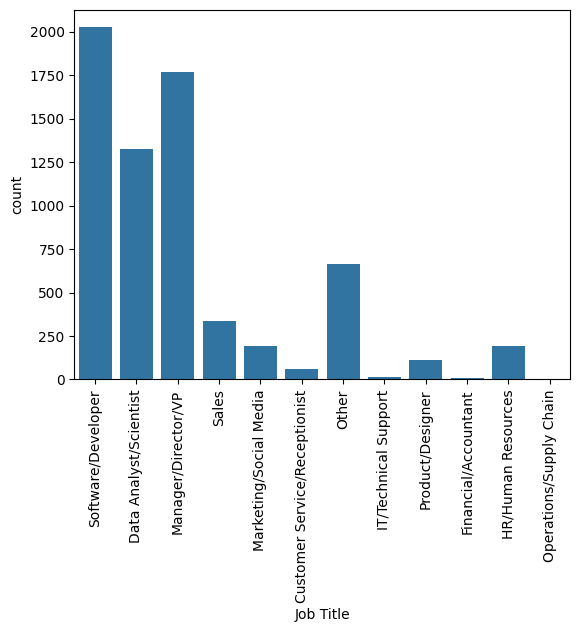

In [21]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

**Years of Experience**

<Axes: xlabel='Years of Experience', ylabel='Count'>

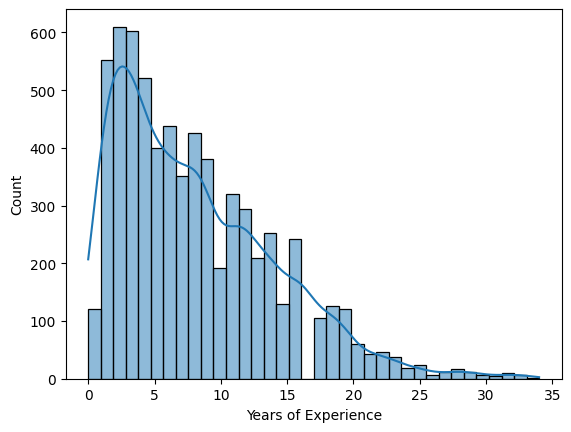

In [22]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

**Country**

([0, 1, 2, 3, 4],
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

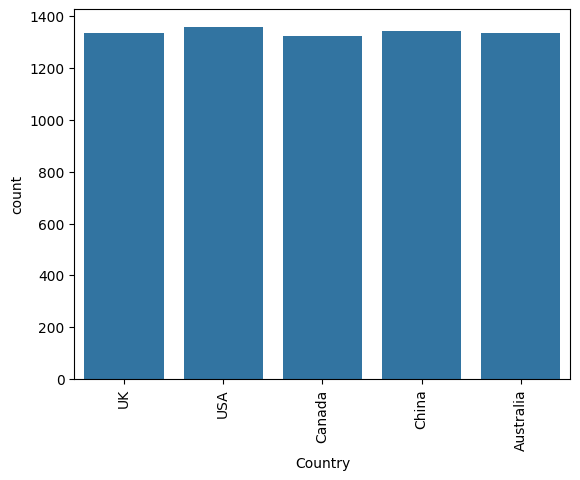

In [23]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)

The number of employees from the above 5 countries is nearly same, with a little more in USA.

**Racial Distribution**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

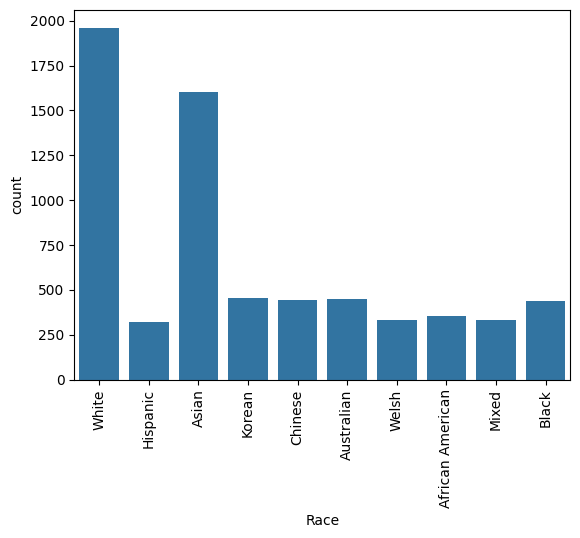

In [24]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

This graph help us to know about the racial distribution in the dataset. From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now I am gonna explore the realtion of these independent variables with the target Variable i.e. Salary.

**Age and Salary**

Text(0.5, 1.0, 'Age vs Salary')

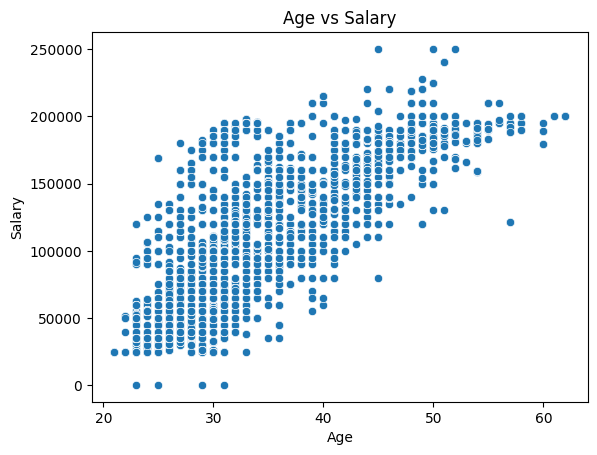

In [26]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. However upon closer observation we can find that similar age have multiple salaries, which means there are other factors which decides the salary.


**Gender and Salary**

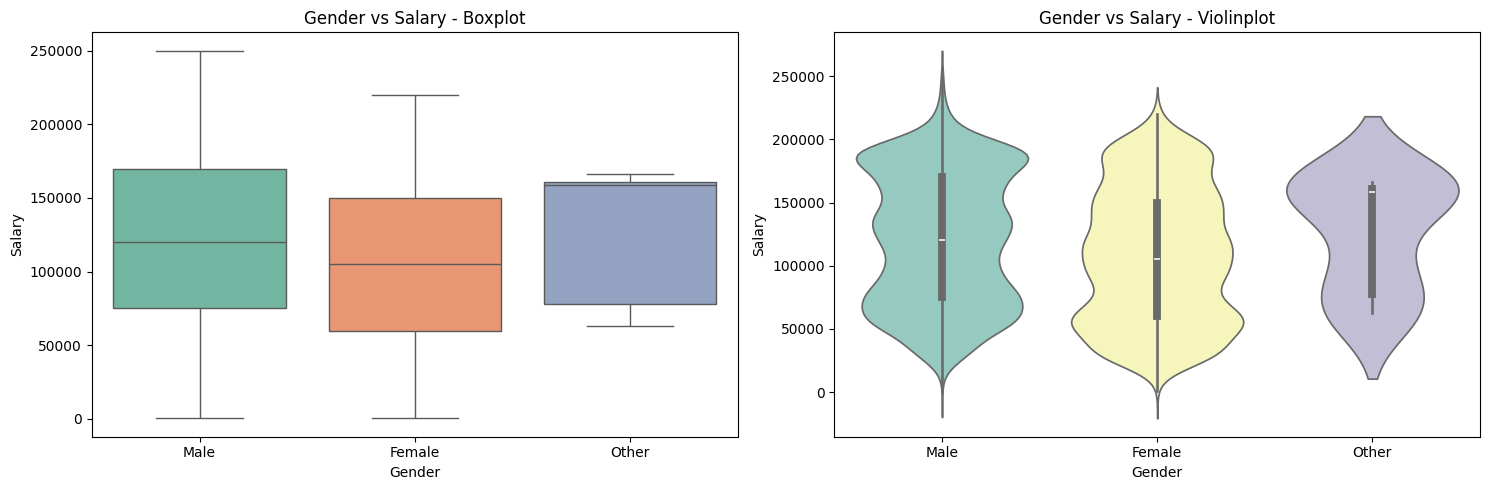

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Gender', y='Salary', hue='Gender', data=df, ax=ax[0], palette='Set2', legend=False)
ax[0].set_title('Gender vs Salary - Boxplot')
sns.violinplot(x='Gender', y='Salary', hue='Gender', data=df, ax=ax[1], palette='Set3', legend=False)
ax[1].set_title('Gender vs Salary - Violinplot')
plt.tight_layout()
plt.show()

The boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from Other gender has quite high salary as compared to Makes and Females. The other gender employees have a median salary above 150000, followed by males with median salary near 107500 and females with median salary near 100000. The voilin plot visualizes the distribution of salary with respect to the gender, where most of the Other gender employees have salary above 150000. In makes this distribution is concentrated between 50000 and 10000 as well as near 200000. In case of females, there salary distribution is quite spread as compared to other genders with most near 50000.

**Education Level and Salary**

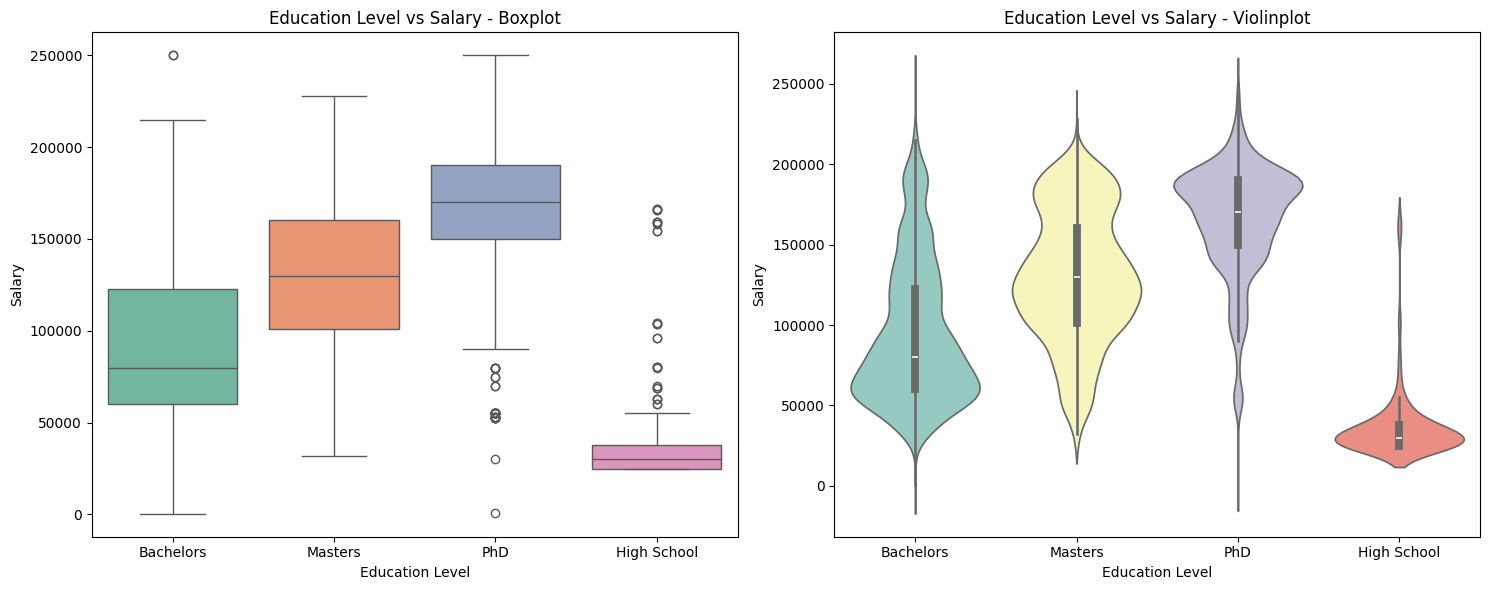

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Education Level', y='Salary', hue='Education Level', data=df, ax=ax[0], palette='Set2', legend=False)
ax[0].set_title('Education Level vs Salary - Boxplot')
sns.violinplot(x='Education Level', y='Salary', hue='Education Level', data=df, ax=ax[1], palette='Set3', legend=False)
ax[1].set_title('Education Level vs Salary - Violinplot')
plt.tight_layout()
plt.show()

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

**Job Title and Salary**

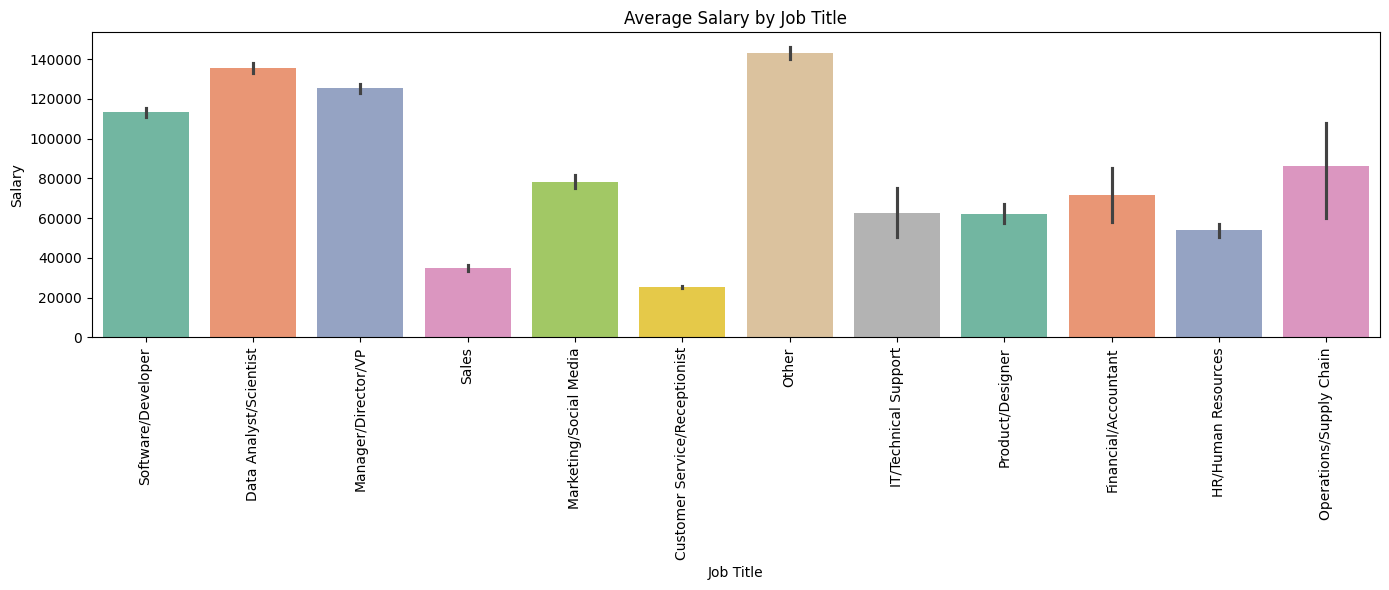

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(x='Job Title', y='Salary', hue='Job Title', data=df, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Average Salary by Job Title')
plt.tight_layout()
plt.show()


This graph falsifies my previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/scuentust and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Operation/Supply chain, HR, Financial/Accountant and Marketing/Social Media are found have much more salary as assumed.

**Experience and Salary**

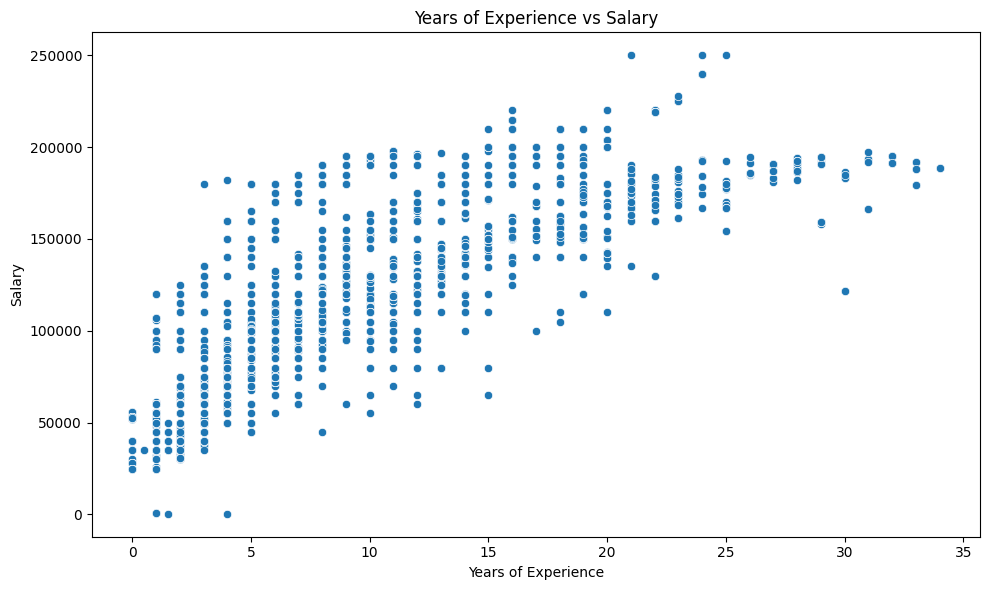

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Years of Experience vs Salary')
plt.tight_layout()
plt.show()


From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

**Experience and Salary by Gender**

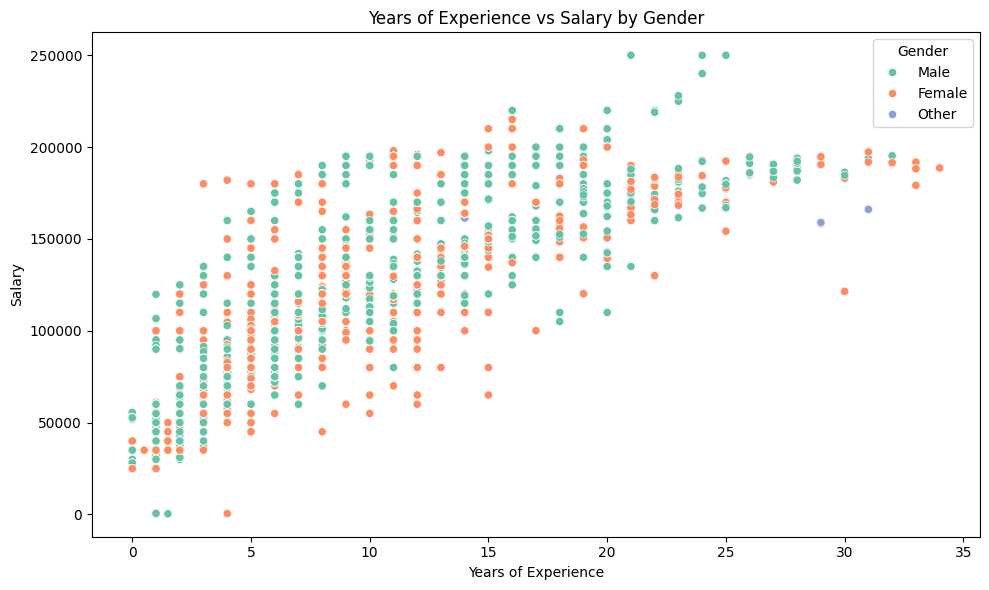

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df, palette='Set2')
plt.title('Years of Experience vs Salary by Gender')
plt.tight_layout()
plt.show()


**Country and Salary**

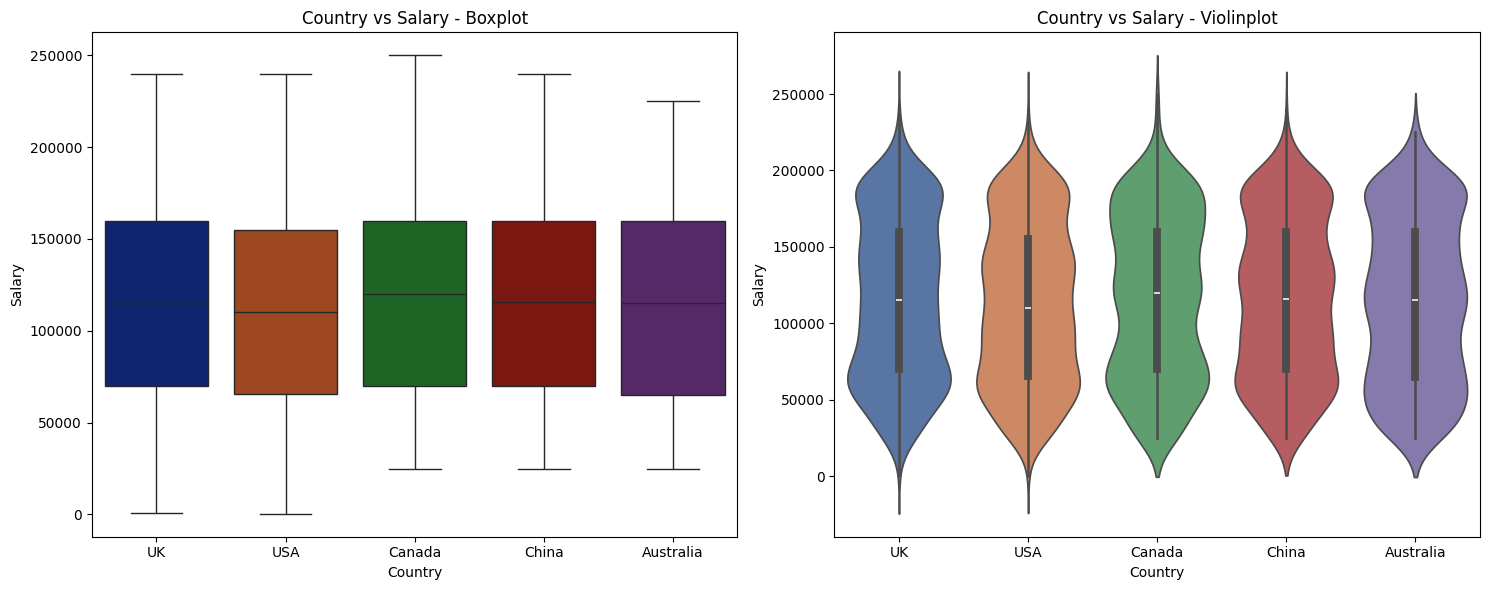

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Country', y='Salary', hue='Country', data=df, ax=ax[0], palette='dark', legend=False)
ax[0].set_title('Country vs Salary - Boxplot')
sns.violinplot(x='Country', y='Salary', hue='Country', data=df, ax=ax[1], palette='deep', legend=False)
ax[1].set_title('Country vs Salary - Violinplot')
plt.tight_layout()
plt.show()

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

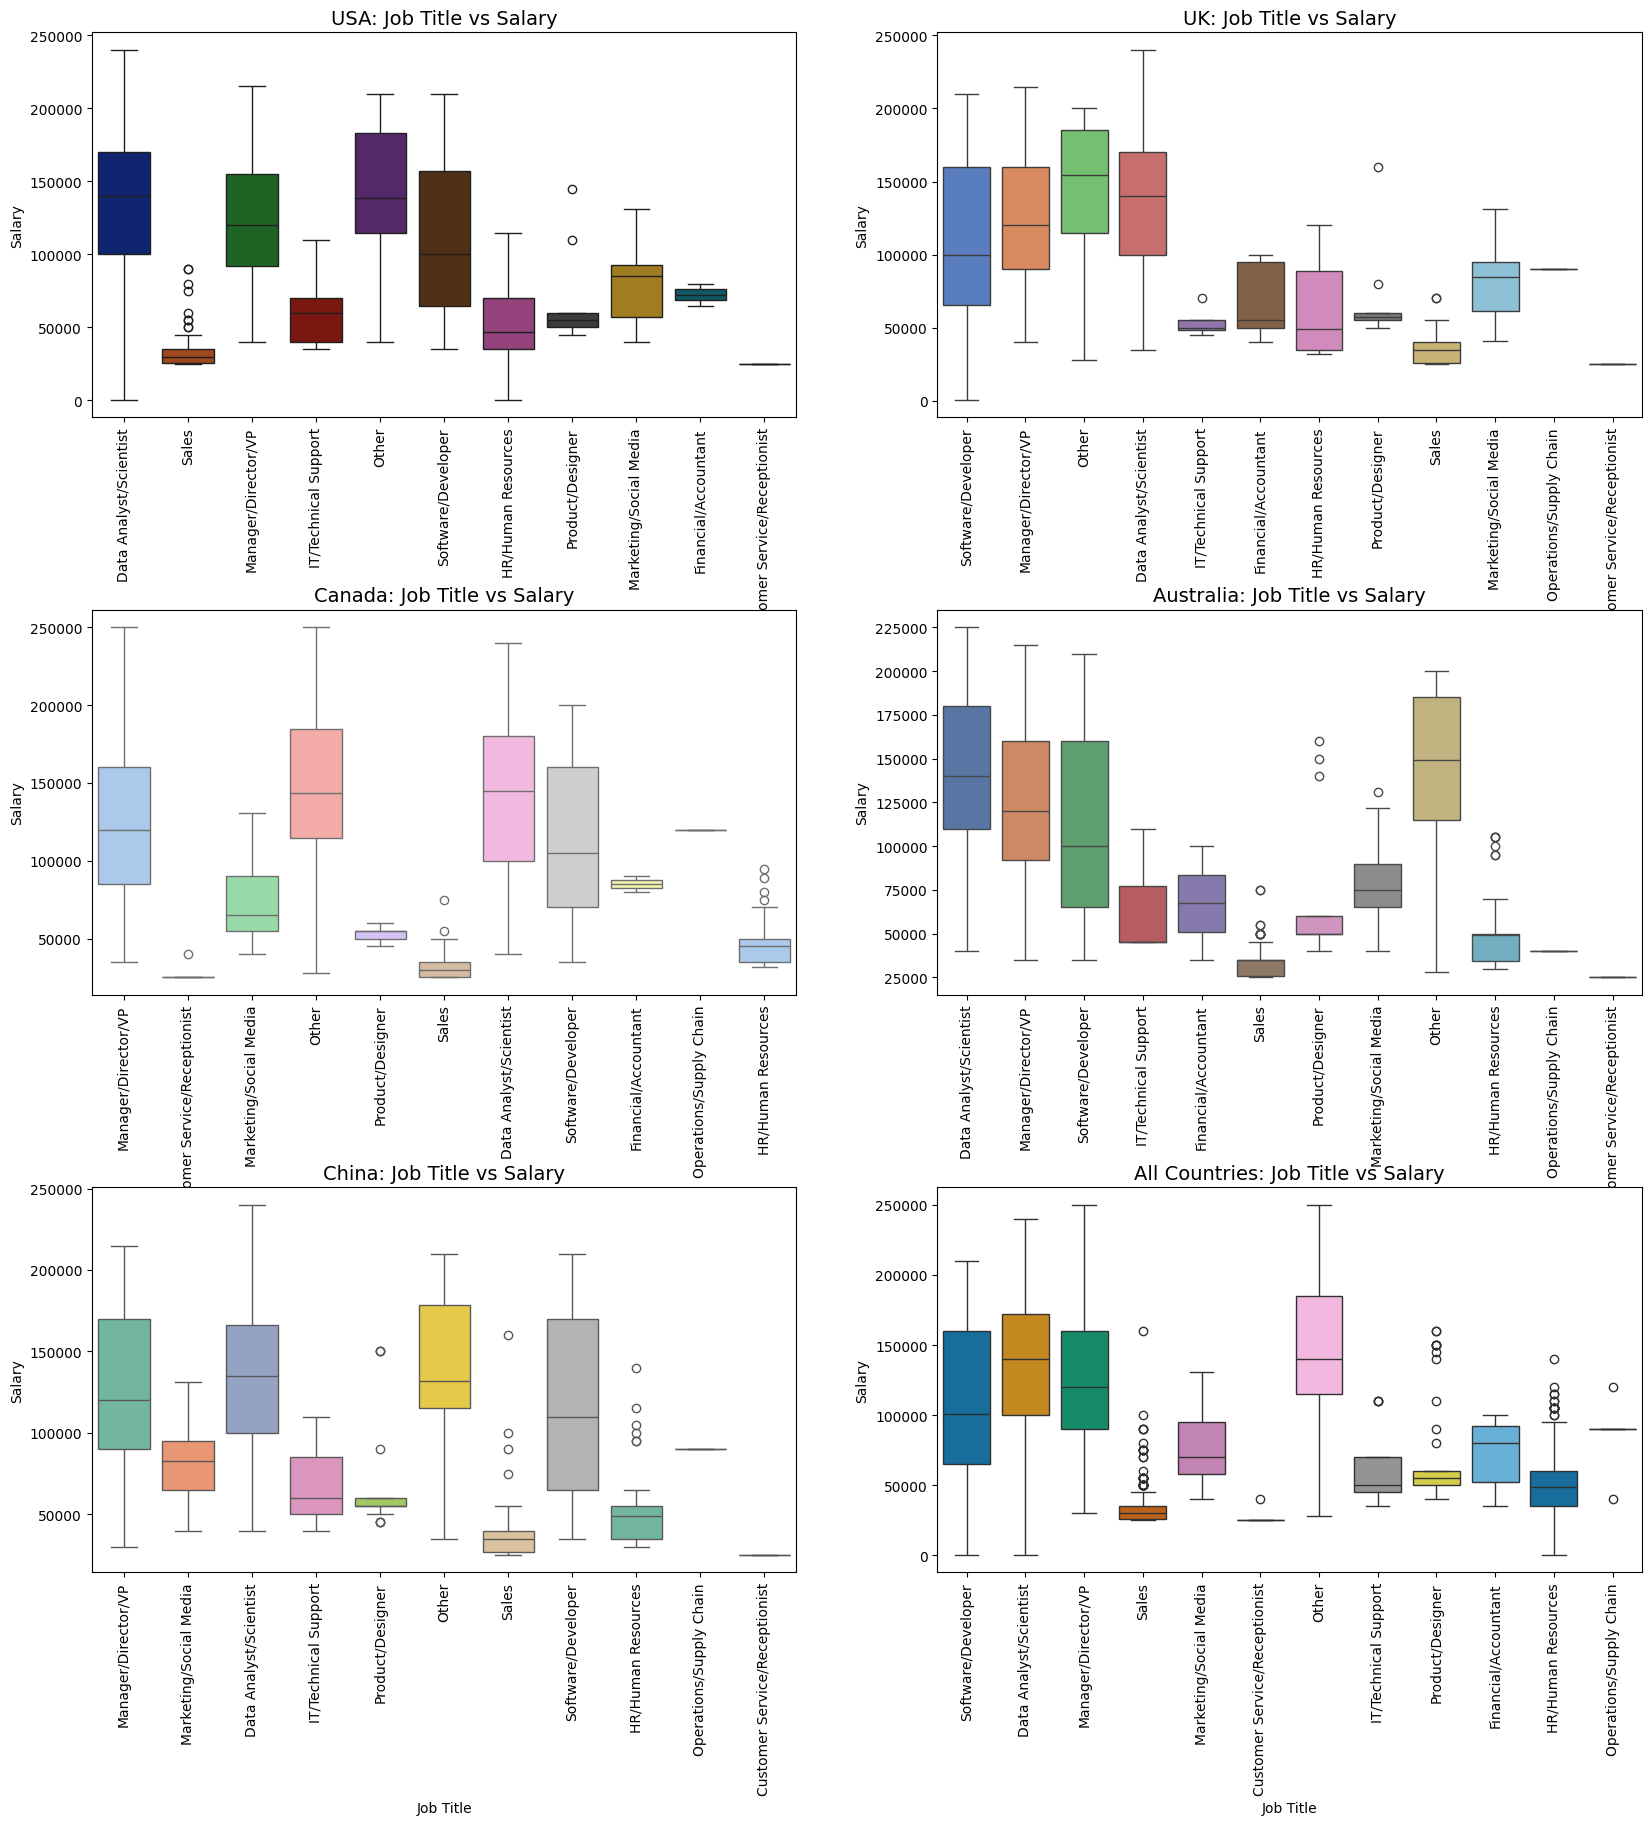

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df[df['Country'] == 'USA'], ax=ax[0, 0], palette='dark', legend=False)
ax[0, 0].set_title('USA: Job Title vs Salary', fontsize=14)
ax[0, 0].tick_params(axis='x', rotation=90)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df[df['Country'] == 'UK'], ax=ax[0, 1], palette='muted', legend=False)
ax[0, 1].set_title('UK: Job Title vs Salary', fontsize=14)
ax[0, 1].tick_params(axis='x', rotation=90)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df[df['Country'] == 'Canada'], ax=ax[1, 0], palette='pastel', legend=False)
ax[1, 0].set_title('Canada: Job Title vs Salary', fontsize=14)
ax[1, 0].tick_params(axis='x', rotation=90)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df[df['Country'] == 'Australia'], ax=ax[1, 1], palette='deep', legend=False)
ax[1, 1].set_title('Australia: Job Title vs Salary', fontsize=14)
ax[1, 1].tick_params(axis='x', rotation=90)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df[df['Country'] == 'China'], ax=ax[2, 0], palette='Set2', legend=False)
ax[2, 0].set_title('China: Job Title vs Salary', fontsize=14)
ax[2, 0].tick_params(axis='x', rotation=90)
sns.boxplot(x='Job Title', y='Salary', hue='Job Title',
            data=df, ax=ax[2, 1], palette='colorblind', legend=False)
ax[2, 1].set_title('All Countries: Job Title vs Salary', fontsize=14)
ax[2, 1].tick_params(axis='x', rotation=90)


After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.

**Race and Salary**

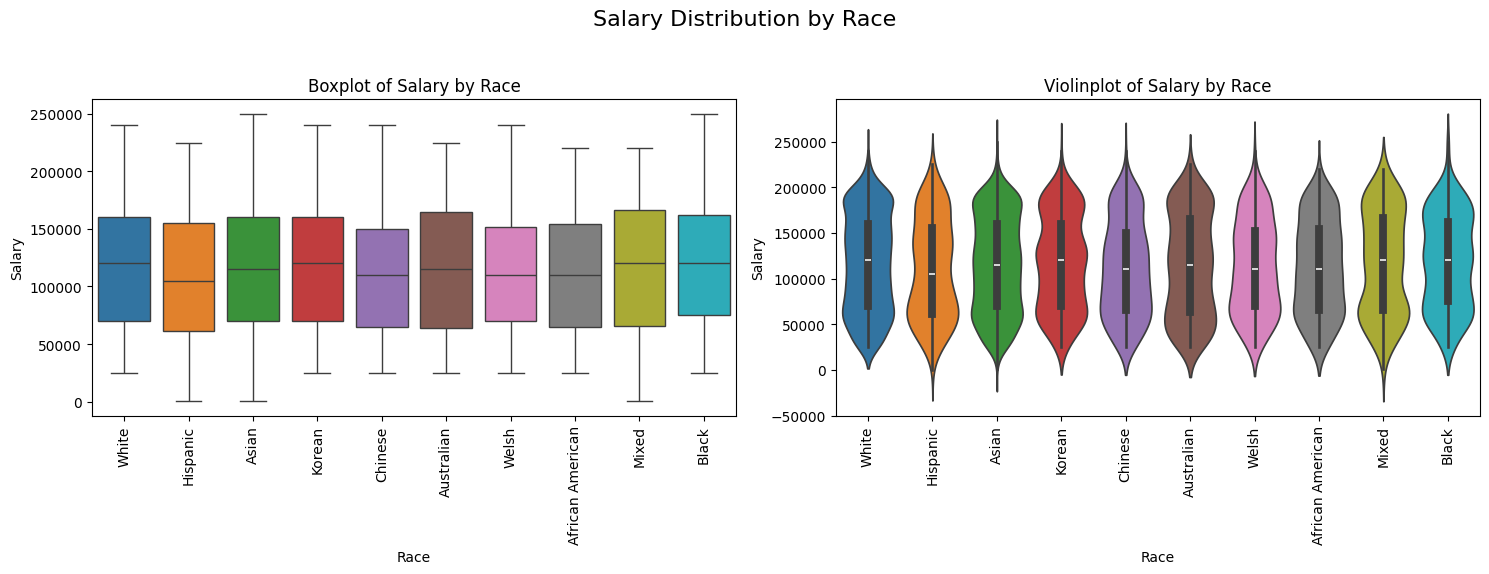

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define custom color palette
race_palette = {
    'White': '#1f77b4',
    'Hispanic': '#ff7f0e',
    'Asian': '#2ca02c',
    'Korean': '#d62728',
    'Chinese': '#9467bd',
    'Australian': '#8c564b',
    'Welsh': '#e377c2',
    'African American': '#7f7f7f',
    'Mixed': '#bcbd22',
    'Black': '#17becf'
}
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# ✅ Add `hue='Race'` and `legend=False` to suppress redundant legend
sns.boxplot(x='Race', y='Salary', hue='Race', data=df, ax=ax[0], palette=race_palette, legend=False)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Boxplot of Salary by Race')
sns.violinplot(x='Race', y='Salary', hue='Race', data=df, ax=ax[1], palette=race_palette, legend=False)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Violinplot of Salary by Race')
plt.suptitle('Salary Distribution by Race', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k.

****Data Preprocessing 2****

**Label encoding to categorical features**

In [40]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


**Normalization**

In [41]:
# Normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply StandardScaler to selected continuous columns
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [42]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


**Coorelation Matrix Heatmap**

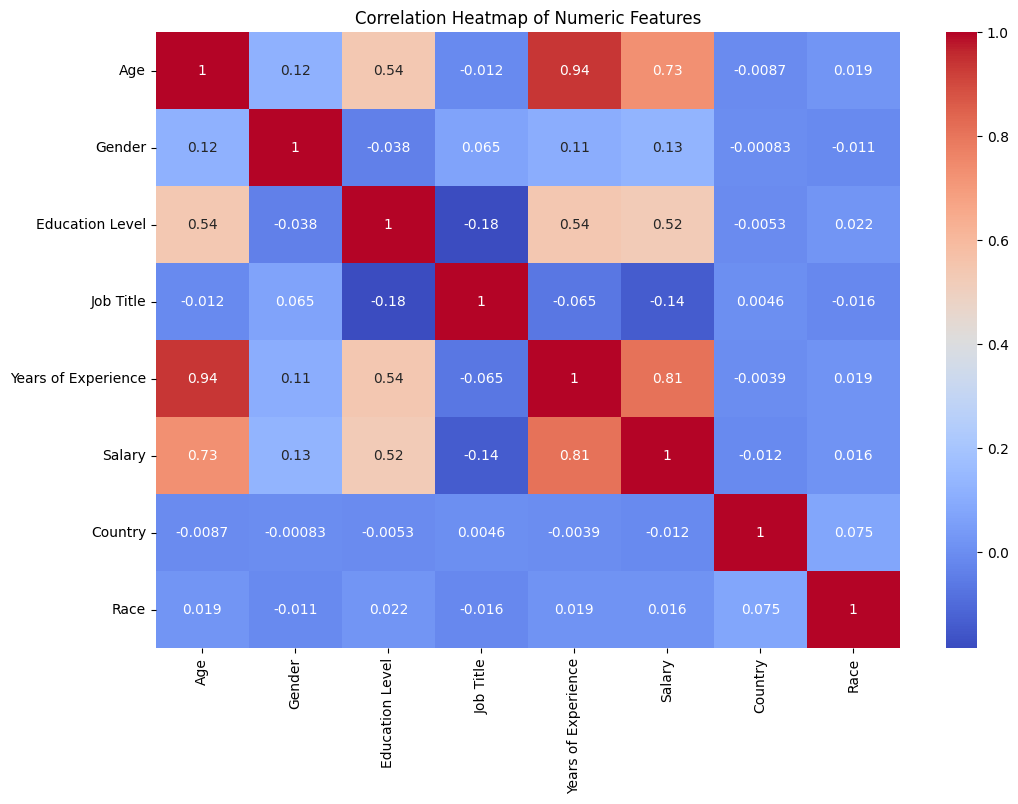

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In this coorelation matrix, there are three major coorealtions.

Salary and Age
Salary and Years of Experience
Years of Experience and Age
The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

**Train Test Split**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

**Salary Prediction**

I will be using the following models:
Decision Tree Regressor
Random Forest Regressor

**Decision Tree Regressor**

In [45]:
from sklearn.tree import DecisionTreeRegressor
#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

**Hypertuning the model**

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}
# Assuming dtree is your DecisionTreeRegressor
grid_search = GridSearchCV(dtree, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


Building the model on best parameters

In [47]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [49]:
#fitting the training data
from sklearn.tree import DecisionTreeRegressor
# Create a fresh and valid decision tree
dtree = DecisionTreeRegressor(
    max_depth=10,
    max_features='sqrt',        # valid: 'sqrt', 'log2', None, int or float
    min_samples_leaf=2,
    min_samples_split=6,
    random_state=0
)
# Now fit it
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [50]:
#training accuracy
dtree.score(X_train, y_train)

0.9026424070583517

In [51]:
#predicting the salary of an employee 
d_pred = dtree.predict(X_test)

**Evaluating the Decision Tree Regressor Model**

In [52]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.330758
1,-0.745659,-0.730151
2,-0.290405,-0.290405
3,-1.048183,-1.033611
4,-0.669294,-0.373575
5,1.414598,1.326190
6,-0.820850,-0.820850
7,-1.142906,-1.075247
8,1.509320,0.343670
9,0.277930,0.809597


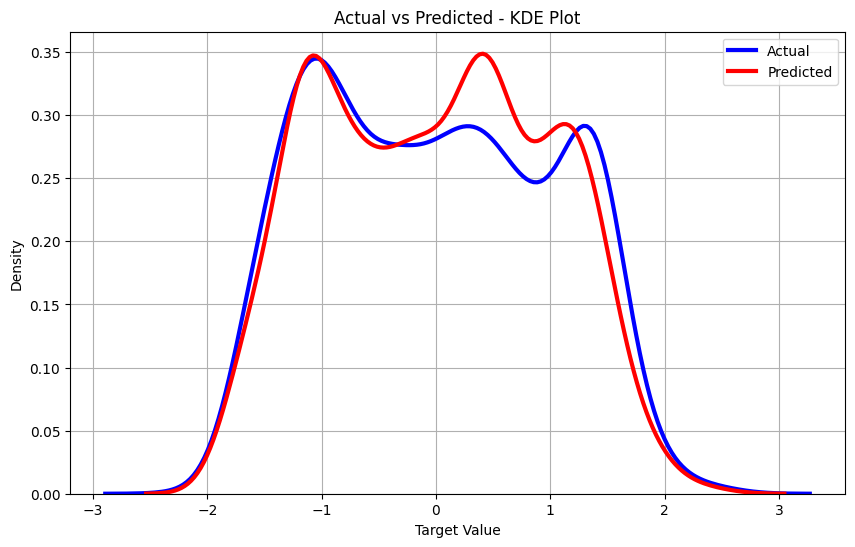

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.kdeplot(dft['Actual'], color='blue', linewidth=3, label='Actual')
sns.kdeplot(dft['Predicted'], color='red', linewidth=3, label='Predicted')
plt.title('Actual vs Predicted - KDE Plot')
plt.xlabel('Target Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.8830099115541592
Mean Squared Error:  0.11972398748602252
Mean Absolute Error:  0.22124965078028738
RMSE: 0.346011542417334


**Random Forest Regressor**

In [56]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [57]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
#training accuracy
rfg.score(X_train, y_train)

0.9879307720926493

In [59]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

**Evaluating Random Forest Regressor Model**

In [60]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.644795
1,-0.745659,-0.716545
2,-0.290405,-0.288510
3,-1.048183,-1.048183
4,-0.669294,-0.615902
5,1.414598,1.497006
6,-0.820850,-0.809246
7,-1.142906,-1.114600
8,1.509320,1.538084
9,0.277930,0.308777


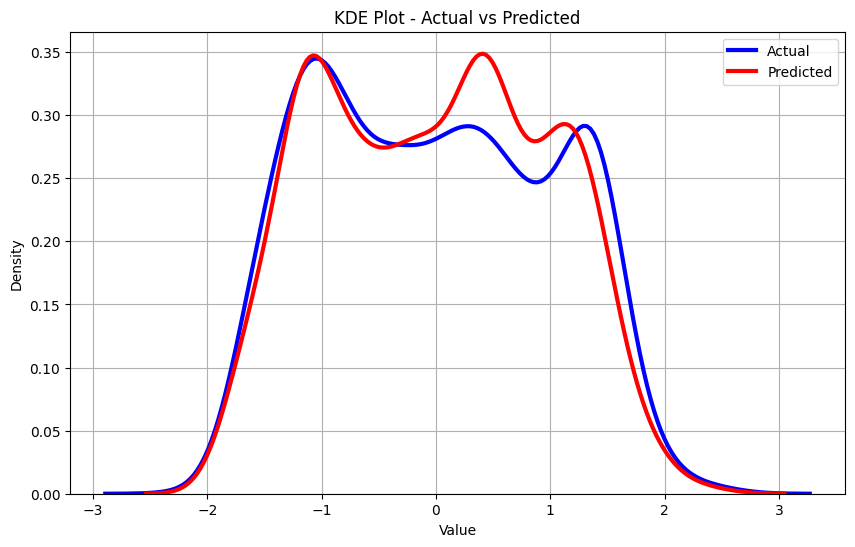

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# Plotting Actual values
sns.kdeplot(data=dft, x='Actual', color='blue', linewidth=3, label='Actual')
# Plotting Predicted values
sns.kdeplot(data=dft, x='Predicted', color='red', linewidth=3, label='Predicted')
# Plot styling
plt.title('KDE Plot - Actual vs Predicted')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [63]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9475789428806121
Mean Squared Error:  0.0536460658329283
Mean Absolute Error:  0.11326677017454302
RMSE: 0.2316162037356806


**Conclusion**

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:

    1.Years of Experience   
    2.Job Title 
    3.Education Level   

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of **94.7%**.